In [22]:
import cv2 as cv
import numpy as np
import dlib 
from renderFace import renderFace
from dataPath import DATA_PATH
from dataPath import MODEL_PATH


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [25]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x),int(p.y)))

  f.close()

In [26]:
# Landmark model location
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

In [27]:
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

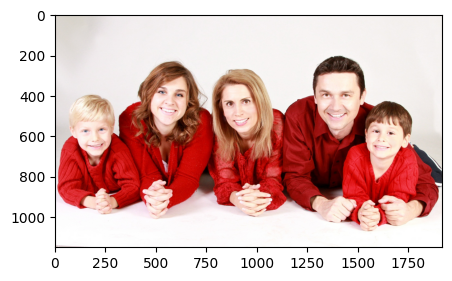

In [38]:
# Read Image
imageFileName = DATA_PATH+"images/family.jpg"
im = cv.imread(imageFileName)

landmarksBasename = "results/family"

plt.figure(figsize=(5,5))
plt.imshow(im[:,:,::-1])
plt.imshow(im[:,:,::-1])

plt.show()


In [29]:
# Detect Faces
faceRects = faceDetector(im)

print("Number of faces detected: ",len(faceRects))

Number of faces detected:  5


In [33]:
# List all landmarks

landmarksAll = []

for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(
        int(faceRects[i].left()),
        int(faceRects[i].top()),
        int(faceRects[i].right()),
        int(faceRects[i].bottom())
    )

    landmarks = landmarkDetector(im, newRect)
    if(i == 0):
        print("Number of landmarks",len(landmarks.parts()))

    landmarksAll.append(landmarks)

    renderFace(im, landmarks)

    landmarksFileName = landmarksBasename +"_"+ str(i)+ ".txt"
    print("Saving landmarks to", landmarksFileName)
    writeLandmarksToFile(landmarks, landmarksFileName)


Number of landmarks 68
Saving landmarks to results/family_0.txt
Saving landmarks to results/family_1.txt
Saving landmarks to results/family_2.txt
Saving landmarks to results/family_3.txt
Saving landmarks to results/family_4.txt


In [34]:
# Save landmark image
outputFileName = "results/familyLandmarks.jpg"
print("Saving output image to", outputFileName)

cv.imwrite(outputFileName, im)

Saving output image to results/familyLandmarks.jpg


True

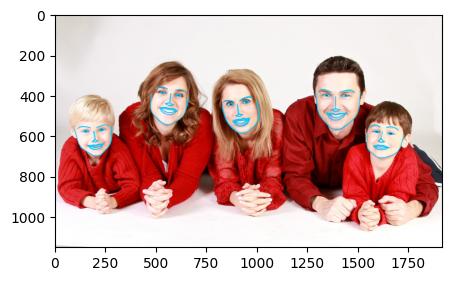

In [37]:
# Show Output Image

plt.figure(figsize=(5,5))
plt.imshow(im[:,:,::-1])
plt.show()